In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\caash\Downloads\archive (8)\synthetic_asthma_dataset.csv")

In [2]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [4]:
df.isnull().mean()*100

Patient_ID                  0.00
Age                         0.00
Gender                      0.00
BMI                         0.00
Smoking_Status              0.00
Family_History              0.00
Allergies                  29.36
Air_Pollution_Level         0.00
Physical_Activity_Level     0.00
Occupation_Type             0.00
Comorbidities              49.67
Medication_Adherence        0.00
Number_of_ER_Visits         0.00
Peak_Expiratory_Flow        0.00
FeNO_Level                  0.00
Has_Asthma                  0.00
Asthma_Control_Level       75.67
dtype: float64

<Axes: xlabel='Allergies'>

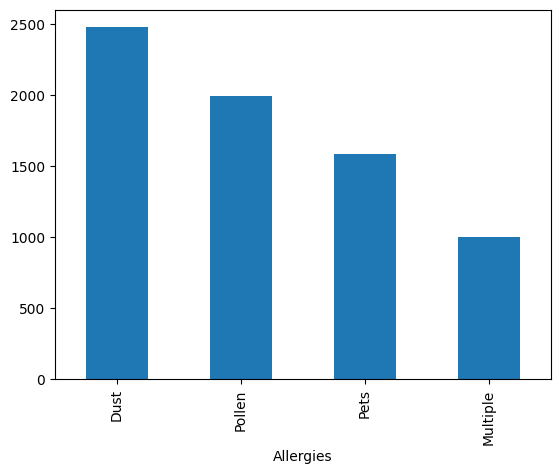

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
df["Allergies"].value_counts().sort_values(ascending=False).plot.bar()

In [6]:
df["Allergies"] = df["Allergies"].fillna("Missing")

<Axes: xlabel='Allergies'>

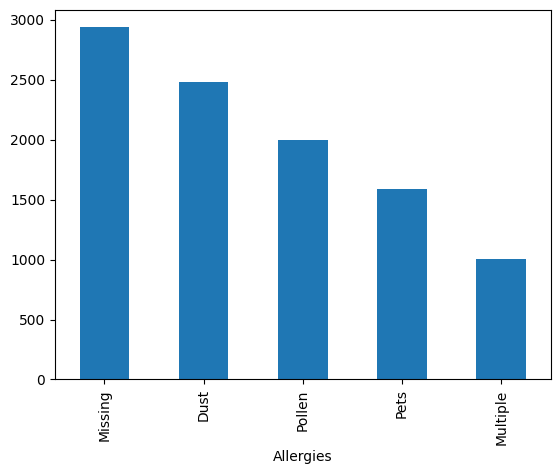

In [7]:
df["Allergies"].value_counts().sort_values(ascending=False).plot.bar()

<Axes: xlabel='Comorbidities'>

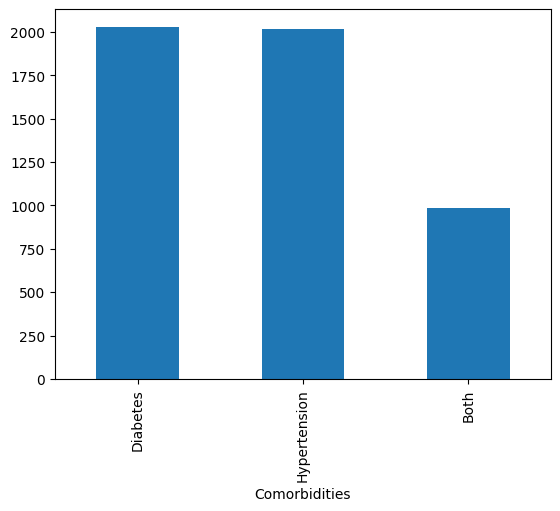

In [8]:
df["Comorbidities"].value_counts().sort_values(ascending=False).plot.bar()

<Axes: xlabel='Comorbidities'>

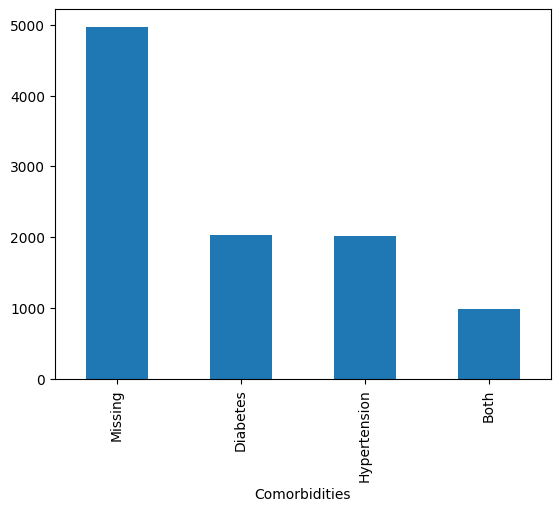

In [9]:
df["Comorbidities"] = df["Comorbidities"].fillna("Missing")
df["Comorbidities"].value_counts().sort_values(ascending=False).plot.bar()

In [10]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr
le_allergies = LabelEncoder()
df['Allergies_encoded'] = le_allergies.fit_transform(df['Allergies'])
le_comorbidities = LabelEncoder()
df['Comorbidities_encoded'] = le_comorbidities.fit_transform(df['Comorbidities'])
corr_allergies, pval_allergies = pointbiserialr(df['Allergies_encoded'], df['Has_Asthma'])
corr_comorbidities, pval_comorbidities = pointbiserialr(df['Comorbidities_encoded'], df['Has_Asthma'])
print(f"Correlation between Allergies and Target: {corr_allergies}, p-value: {pval_allergies}")
print(f"Correlation between Comorbidities and Target: {corr_comorbidities}, p-value: {pval_comorbidities}")

Correlation between Allergies and Target: 0.10052117727694654, p-value: 7.025948654213285e-24
Correlation between Comorbidities and Target: 0.002007786466333099, p-value: 0.8408911286059148


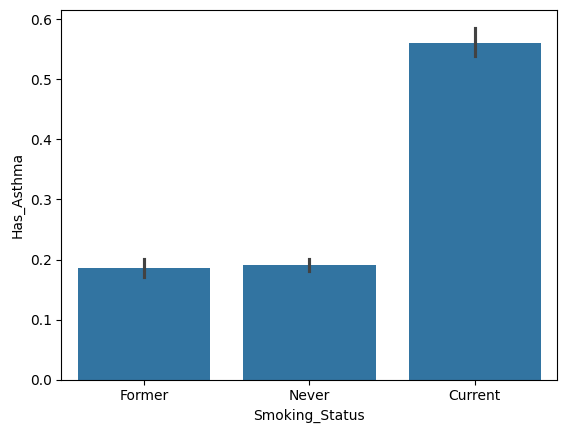

In [11]:
sns.barplot(df,x="Smoking_Status",y="Has_Asthma")
plt.show()

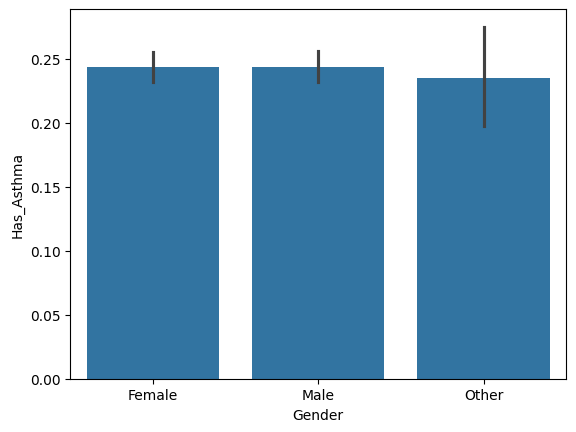

In [12]:
sns.barplot(df,x="Gender",y="Has_Asthma")
plt.show()

In [14]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level,Allergies_encoded,Comorbidities_encoded
0,ASTH100000,52,Female,27.6,Former,1,Missing,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN,1,1
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN,0,0
2,ASTH100002,72,Female,17.6,Never,0,Missing,Moderate,Moderate,Indoor,Missing,0.38,0,303.3,15.3,0,NaN,1,3
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled,2,0
4,ASTH100004,21,Male,30.2,Never,0,Missing,Moderate,Active,Indoor,Missing,0.82,3,535.0,27.7,0,NaN,1,3


In [15]:
col_drp=["Patient_ID","Comorbidities","Asthma_Control_Level","Allergies_encoded","Allergies_encoded","Comorbidities_encoded"]
df=df.drop(col_drp,axis=1)

In [16]:
df.shape

(10000, 14)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
numerical_cols=["Age","BMI","Family_History","Medication_Adherence","Number_of_ER_Visits","Peak_Expiratory_Flow","FeNO_Level"]
categorical_cols=["Gender","Smoking_Status","Allergies","Air_Pollution_Level","Physical_Activity_Level","Occupation_Type"]
preprocessor=ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(handle_unknown="ignore"),categorical_cols),
        ("num",StandardScaler(),numerical_cols)
    ],
    remainder="passthrough"
)
log_class=Pipeline(
    [
        ("preprocessor",preprocessor),
        ("classifier",LogisticRegression())
    ]
)

In [35]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import train_test_split
cv = KFold(n_splits=5, shuffle=True, random_state=42)
X=df.drop("Has_Asthma",axis=1)
y=df["Has_Asthma"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(log_class, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", np.mean(scores))

Cross-validation scores: [0.9825   0.9875   0.9875   0.9875   0.980625]
Mean cross-validation accuracy: 0.985125


In [36]:
log_class.fit(X_train, y_train)
y_pred = log_class.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9895


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9896445901639344
Recall: 0.9895
F1 Score: 0.9894228554117611
Confusion Matrix:
 [[1504    0]
 [  21  475]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1504
           1       1.00      0.96      0.98       496

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



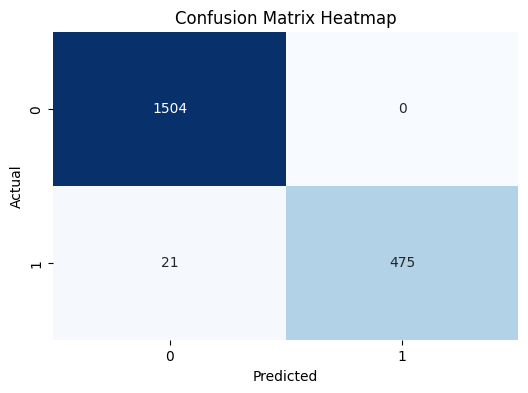

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
numerical_cols=["Age","BMI","Family_History","Medication_Adherence","Number_of_ER_Visits","Peak_Expiratory_Flow","FeNO_Level"]
categorical_cols=["Gender","Smoking_Status","Allergies","Air_Pollution_Level","Physical_Activity_Level","Occupation_Type"]
preprocessor=ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(handle_unknown="ignore"),categorical_cols),
        ("num",StandardScaler(),numerical_cols)
    ],
    remainder="passthrough"
)
dec_class=Pipeline(
    [
        ("preprocessor",preprocessor),
        ("classifier",DecisionTreeClassifier())
    ]
)

In [37]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
cv = KFold(n_splits=5, shuffle=True, random_state=42)
X=df.drop("Has_Asthma",axis=1)
y=df["Has_Asthma"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = cross_val_score(dec_class, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", np.mean(scores))

Cross-validation scores: [1.       0.999375 1.       0.99875  1.      ]
Mean cross-validation accuracy: 0.999625


In [38]:
dec_class.fit(X_train, y_train)
y_pred = dec_class.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9995


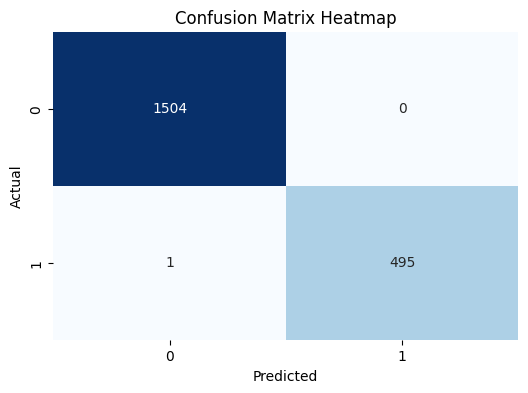

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.9995003322259136
Recall: 0.9995
F1 Score: 0.9994998308136472
Confusion Matrix:
 [[1504    0]
 [   1  495]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [44]:

df_encoded = df.copy()


for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


correlations = df_encoded.corr()['Has_Asthma'].sort_values(ascending=False)
print(correlations)


Has_Asthma                 1.000000
Family_History             0.409531
Physical_Activity_Level    0.265186
Allergies                  0.100521
BMI                        0.098425
FeNO_Level                 0.007012
Number_of_ER_Visits        0.005781
Medication_Adherence       0.003785
Gender                    -0.002069
Age                       -0.004346
Peak_Expiratory_Flow      -0.005207
Occupation_Type           -0.010912
Smoking_Status            -0.246034
Air_Pollution_Level       -0.314804
Name: Has_Asthma, dtype: float64


In [43]:
print(df['Smoking_Status'].value_counts())
print(df['Air_Pollution_Level'].value_counts())

Smoking_Status
Never      6070
Former     2487
Current    1443
Name: count, dtype: int64
Air_Pollution_Level
Moderate    4915
Low         2984
High        2101
Name: count, dtype: int64
